In [1]:
import PyPDF2
from PyPDF2 import PdfFileReader
from pathlib import Path
import pandas as pd
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
#Create a pdf file

pdffiletrade = open("462-8.pdf",'rb') 
pdfReader = PdfFileReader(pdffiletrade)

In [3]:
#Two step analysis
#1. Grab the page

page_object = pdfReader.getPage(0)
print(page_object)

# 2. Extract text

textpage = page_object.extractText()
print(textpage)

{'/Contents': [IndirectObject(18, 0), IndirectObject(19, 0), IndirectObject(20, 0), IndirectObject(21, 0), IndirectObject(22, 0), IndirectObject(23, 0), IndirectObject(26, 0), IndirectObject(27, 0)], '/CropBox': [0, 0, 595, 842], '/MediaBox': [0, 0, 595, 842], '/Parent': IndirectObject(12, 0), '/Resources': IndirectObject(35, 0), '/Rotate': 0, '/Type': '/Page'}
    WT/DS462/8
  11 October 2013
 (13-5541)
 Page: 1/2   Original: English
   RUSSIAN FEDERATION Œ RECYCLING FEE ON MOTOR VEHICLES 
REQUEST FOR THE ESTABLISHMENT OF 
A PANEL BY THE EUROPEAN UNION 
 The following communication, dated 10 October 2013, from the delegation of the 
European Union to the Chairperson of the Disput
e Settlement Body, is circulated pursuant to 
Article 6.2 of the DSU. 
 _______________ 
  On 9 July 2013, the European Union requested 
consultations with the Government of the 
Russian Federation ("Russia"), pursuant to Arti
cles 1 and 4 of the Understanding on Rules and 
Procedures Governing the Settlement

In [4]:
#Number of total pages

total_pages = pdfReader.getNumPages()
total_pages

2

In [5]:
#Combine pages and create a text file

with Path('462.txt').open(mode='w') as output_file:
    text = ''
    for page in range(total_pages):
        #text += page.extractText()
        page = pdfReader.getPage(page)
        text = page.extractText()
    output_file.write(text)

In [6]:
#clean the text from unnecessary Characters

# load text
filename = '462.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

# split into words by white space
words = text.split()
print(words[:100])

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
print(stripped[:100])

# convert to lower case
words = [word.lower() for word in words]
print(words[:100])

['WT/DS462/8', '-', '2', '-', '"),', 'and', 'Rules', '("")', 'annexed', 'thereto,', 'published', 'in', 'Rossiyskaya', 'Gazeta', 'No', '5873', 'of', '31', 'August', '2012.', 'For', 'each', 'of', 'these', 'measures,', 'this', 'request', 'also', 'covers', 'any', 'amendments,', 'replacements,', 'extensions,', 'implementing', 'measures', 'or', 'other', 'related', 'measures,', 'including', 'any', 'act', 'of', "Russia's", 'Parliament', 'or', "Russia's", 'executive', 'that', 'would', 'conf', 'irm,', 'extend,', 'amend,', 'or', 'otherwise', 'affect', 'the', 'measures', 'in', 'question.', 'The', 'European', 'Union', 'considers', 'that', 'these', 'measures', 'are', 'inconsistent', 'with', "Russia's", 'obligations', 'under', 'the', 'following', 'WTO', 'provisions:', 'Article', 'I:1', 'of', 'the', 'GATT', '1994', 'because', 'Russia', 'has', 'failed', 'to', 'accord', 'any', 'advantage,', 'favour,', 'privilege', 'or', 'immunity', 'granted', 'to', 'products', 'originating']
['WTDS4628', '', '2', '', ''

In [7]:
#  Filter out Stop Words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# Short pipeline of the above process:


# load data
file = open(filename, 'rt')
text = file.read()
file.close()

# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)

# convert to lower case
tokens = [w.lower() for w in tokens]

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]

print(words[:100])

['rules', 'annexed', 'thereto', 'published', 'rossiyskaya', 'gazeta', 'august', 'measures', 'request', 'also', 'covers', 'amendments', 'replacements', 'extensions', 'implementing', 'measures', 'related', 'measures', 'including', 'act', 'russia', 'parliament', 'russia', 'executive', 'would', 'conf', 'irm', 'extend', 'amend', 'otherwise', 'affect', 'measures', 'question', 'european', 'union', 'considers', 'measures', 'inconsistent', 'russia', 'obligations', 'following', 'wto', 'provisions', 'article', 'gatt', 'russia', 'failed', 'accord', 'advantage', 'favour', 'privilege', 'immunity', 'granted', 'products', 'originating', 'countries', 'immediately', 'unconditionally', 'like', 'products', 'originating', 'territories', 'members', 'notably', 'european', 'union', 'article', 'b', 'gatt', 'russia', 'failed', 'accord', 'commerce', 'another', 'member', 'treatment', 'less', 'favourable', 'provided', 'appropriate', 'part', 'schedule', 'annexed', 'gatt', 'russia', 'failed', 'exempt', 'products', '

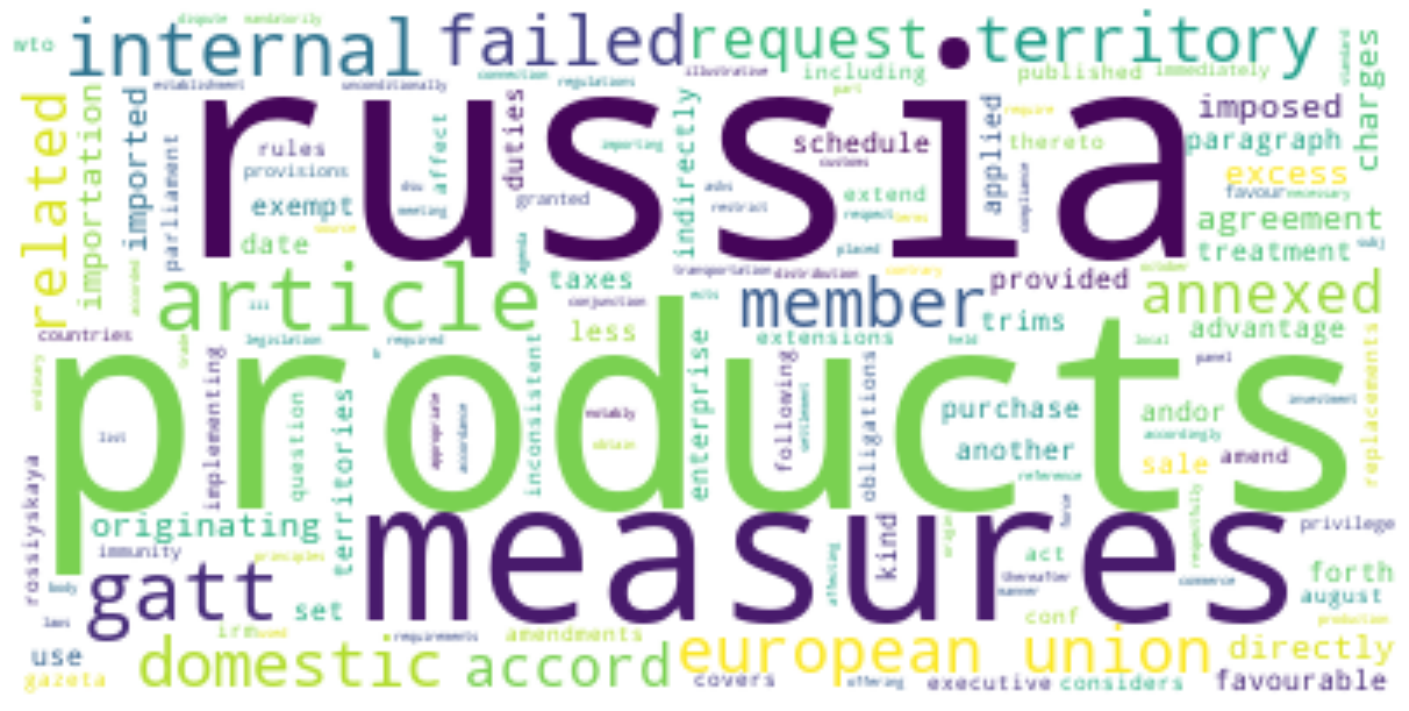

In [9]:
# here we can see the most used words in the dispute file

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

text = ' '.join(str(n).lower() for n in words)

#Generate wordcloud image
wordcloud = WordCloud(max_words=1000, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))

#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
def extract_title(self, genre: str) -> pd.DataFrame:
    found = True
    current_number = 1
    titles = list()
    subtitles = list()
    texts = list()
    while found:
        file_name = "{462.txt".format(current_number)
        text_data = self.read_and_split_file(genre, file_name)
        if len(text_data) != 0:
            titles.append(text_data[0])
            subtitles.append(text_data[1])
            article_text = ' '.join(text_data[2:])
            texts.append(article_text)
            current_number += 1
        else:
            found = False

    genres = [genre] * len(titles)
    data = {'title': titles, 'subtitle': subtitles, 'text': texts}
    data_frame = pd.DataFrame(data)
    return data_frame

In [11]:
def transform_texts_to_df(self, name, delimiter = '\t'):
    article_df_list = list()
    for genre in genre_list:
        article_df_list.append(self.extract_genre_files(genre))
    df = pd.concat(article_df_list)
    df.to_csv(name, sep=delimiter)
    return df

In [12]:
if __name__ == "__main__":
    genre_list = ['business', 'entertainment', 'politics', 'sport', 'tech']
    parser = ArticleCSVParser()
    df = parser.transform_texts_to_df('bbc_articles.csv', genre_list)
    print(df.head())

NameError: name 'ArticleCSVParser' is not defined